In [55]:
import os
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import stopwords
from nltk.chunk import conlltags2tree, tree2conlltags
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

In [4]:
path = "train_tweets.txt"
df = pd.read_csv(path,delimiter="\t", header = None)
df.rename(columns={0:'id',1:'tweet'},inplace=True)

<h3> Derive Features </h3>

In [5]:
df['mention'] = df.apply(lambda row: 1 if '@handle' in row.tweet else 0, axis = 1)
df['retweet'] = df.apply(lambda row: 1 if row.tweet[0:2] == 'RT' else 0, axis = 1)
df['http'] = df.apply(lambda row: 1 if re.findall('https?:\/\/.*[\r\n]*',row.tweet) != [] else 0, axis = 1)
df['len_char'] = df.apply(lambda row: len(row.tweet), axis = 1)
df['len_words'] = df.apply(lambda row: len(row.tweet.split()), axis = 1)
df['unique_words'] = df.apply(lambda row: len(set(row.tweet.lower().split())), axis = 1)
df['num_dots'] = df.apply(lambda row: len(re.findall('\.',row.tweet)), axis = 1)
df['num_comma'] = df.apply(lambda row: len(re.findall(',',row.tweet)), axis = 1)
df['num_exclamation'] = df.apply(lambda row: len(re.findall('!',row.tweet)), axis = 1)
df['num_colon'] = df.apply(lambda row: len(re.findall(':',row.tweet)), axis = 1)
df['num_semicolon'] = df.apply(lambda row: len(re.findall(';',row.tweet)), axis = 1)
df['num_question'] = df.apply(lambda row: len(re.findall('\?',row.tweet)), axis = 1)
df['num_capital'] = df.apply(lambda row: len(re.findall('[A-Z]',row.tweet)), axis = 1)
df['num_hashtag'] = df.apply(lambda row: len(re.findall('#(.)+',row.tweet)), axis = 1)
df['num_stopwords'] = df.apply(lambda row: len([w for w in row.tweet.lower().split() if w in stopwords.words('english')]), axis = 1)
df['pos_tag'] = df.apply(lambda row: [tag[1] for tag in nltk.pos_tag(nltk.word_tokenize(row.tweet))], axis = 1)
df['num_pos'] = df.apply(lambda row: len(set(row.pos_tag)), axis = 1)
df['num_noun'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "NN"]), axis = 1)
df['num_propernoun'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "NNP"]), axis = 1)
df['num_propernouns'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "NNPS"]), axis = 1)
df['num_pronoun'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "PRP"]), axis = 1)
df['num_posspronoun'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "PRP$"]), axis = 1)
df['num_adjective'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "JJ"]), axis = 1)
df['num_determiner'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "DT"]), axis = 1)
df['num_preposition'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "IN"]), axis = 1)
df['num_verb'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VB"]), axis = 1)
df['num_verbpast'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBD"]), axis = 1)
df['num_verbgerund'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBG"]), axis = 1)
df['num_verbpaspar'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBN"]), axis = 1)
df['num_verbsingpres'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBP"]), axis = 1)
df['num_verbthirdperson'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBZ"]), axis = 1)
df['num_whdeterminer'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WDT"]), axis = 1)
df['num_whpronoun'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WP"]), axis = 1)
df['num_whpronoun'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WP"]), axis = 1)
df['num_whposspronoun'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WP$"]), axis = 1)
df['num_whadverb'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WRB"]), axis = 1)
df['num_adverb'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "RB"]), axis = 1)
df['num_adverbcomp'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "RBR"]), axis = 1)
df['num_adverbsuper'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "RBS"]), axis = 1)
df['num_to'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "TO"]), axis = 1)
df['num_possesive'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "POS"]), axis = 1)
df['num_modal'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "MD"]), axis = 1)
df['num_cardinal'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "CD"]), axis = 1)
df['num_conjunction'] = df.apply(lambda row: len([tag for tag in row.pos_tag if tag == "CC"]), axis = 1)
df['num_foreignword'] = df.apply(lambda row: len([tag for tag in row.pos_tag 

In [6]:
df.to_csv("features.csv")

<h3> Explore Data </h3>

In [48]:
df_count = df.groupby(['id']).count().reset_index()[['id','tweet']]

In [49]:
df_count.rename(columns={'tweet':'count_id'},inplace=True)

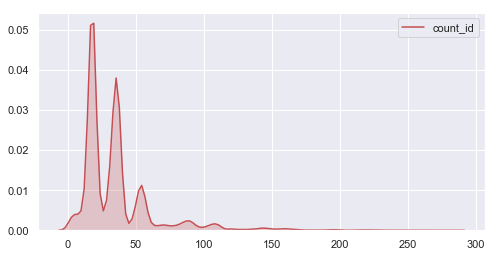

In [53]:
import seaborn as sns

sns.set(rc={'figure.figsize':(8,4)})
           
# plot of 2 variables
p1=sns.kdeplot(df_count['count_id'], shade=True, color="r")
# p1=sns.kdeplot(df['contradiction'], shade=True, color="b")
# p1=sns.kdeplot(df['neutral'], shade=True, color="c")

<h1 > Train Using Full Dataset </h1> 

<h3> Trial #1: kNN with 80% - 20% Train - Test proportion </h3>

In [128]:
y = df['id'].astype(str)
X = df.drop(columns=['id','tweet','pos_tag'])

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [137]:
print("size all:",len(X))
print("size training data:",len(X_train))
print("size test data:",len(X_test))

size all: 328195
size training data: 262556
size test data: 65639


In [140]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [141]:
predictions1 = clf1.predict(X_test)
accuracies = accuracy_score(y_test,predictions1)
print("Accuracy Score:",accuracies)

Accuracy Score: 0.051524246256036806


In [142]:
results = classification_report(y_test,predictions1,output_dict=True)

/Users/indah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/indah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/indah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/indah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<h3> Get ID from kNN with f1-score > 0 </h3>

In [249]:
ids = list(results.keys())
predicted_id = []
for i in range(len(ids)):
    try:
        f1s = results[ids[i]]['f1-score']
        if f1s > 0:
            predicted_id.append(int(ids[i]))
    except:
        print(ids[i])
        continue

accuracy
macro avg
weighted avg


In [251]:
len(predicted_id)

1137

In [252]:
df_filter = df[df['id'].isin(predicted_id)]

In [253]:
df_filter.shape

(67038, 46)

In [254]:
df_count1 = df_filter.groupby(['id']).count().reset_index()[['id','tweet']]

In [255]:
df_count1.rename(columns={'tweet':'count_id'},inplace=True)

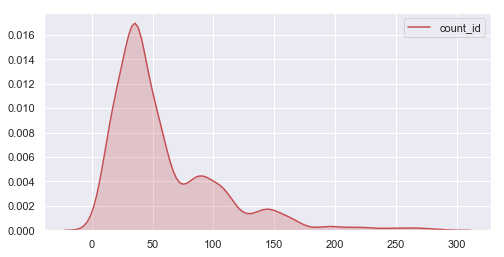

In [256]:
sns.set(rc={'figure.figsize':(8,4)})
p1=sns.kdeplot(df_count1['count_id'], shade=True, color="r")


<h3> Trial #2: kNN with Filtered ID </h3>

In [257]:
y1 = df_filter['id'].astype(str)
X1 = df_filter.drop(columns=['id','tweet','pos_tag'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,train_size=0.8)
print("size all:",len(X1))
print("size training data:",len(X1_train))
print("size test data:",len(X1_test))

size all: 67038
size training data: 53630
size test data: 13408


In [258]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [259]:
predictions2 = clf2.predict(X1_test)
accuracies2 = accuracy_score(y1_test,predictions2)
print("Accuracy Score:",accuracies2)

Accuracy Score: 0.24776252983293556


In [260]:
predictions2_ = clf2.predict(X_test)
accuracies2_ = accuracy_score(y_test,predictions2_)
print("Accuracy Score:",accuracies2_)

Accuracy Score: 0.10192111397187648


<h3> Trial #3: Ridge Regression </h3>

In [188]:
from sklearn.linear_model import RidgeClassifier

In [189]:
clf3 = RidgeClassifier()
clf3.fit(X1_train, y1_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [190]:
predictions3 = clf3.predict(X1_test)
accuracies3 = accuracy_score(y1_test,predictions3)
print("Accuracy Score:",accuracies3)

Accuracy Score: 0.14832347140039448


In [191]:
predictions3_ = clf3.predict(X_test)
accuracies3_ = accuracy_score(y_test,predictions3_)
print("Accuracy Score:",accuracies3_)

Accuracy Score: 0.012675391154648913


<h3> Trial #4: SVM one vs all </h3>

In [194]:
from sklearn.svm import SVC

In [261]:
clf4 = SVC(gamma='auto')
clf4.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [262]:
predictions4 = clf4.predict(X1_test)
accuracies4 = accuracy_score(y1_test,predictions4)
print("Accuracy Score:",accuracies4)

Accuracy Score: 0.27804295942720764


In [197]:
predictions4_ = clf4.predict(X_test)
accuracies4_ = accuracy_score(y_test,predictions4_)
print("Accuracy Score:",accuracies4_)

Accuracy Score: 0.05772482822712107


<h3> Test on Real Test Set </h3>

In [228]:
path2 = "test_tweets_unlabeled.txt"
df_test = pd.read_csv(path2,delimiter="\r\t", header = None)
df_test.rename(columns={0:'tweet'},inplace=True)

/Users/indah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [230]:
df_test['mention'] = df_test.apply(lambda row: 1 if '@handle' in row.tweet else 0, axis = 1)
df_test['retweet'] = df_test.apply(lambda row: 1 if row.tweet[0:2] == 'RT' else 0, axis = 1)
df_test['http'] = df_test.apply(lambda row: 1 if re.findall('https?:\/\/.*[\r\n]*',row.tweet) != [] else 0, axis = 1)
df_test['len_char'] = df_test.apply(lambda row: len(row.tweet), axis = 1)
df_test['len_words'] = df_test.apply(lambda row: len(row.tweet.split()), axis = 1)
df_test['unique_words'] = df_test.apply(lambda row: len(set(row.tweet.lower().split())), axis = 1)
df_test['num_dots'] = df_test.apply(lambda row: len(re.findall('\.',row.tweet)), axis = 1)
df_test['num_comma'] = df_test.apply(lambda row: len(re.findall(',',row.tweet)), axis = 1)
df_test['num_exclamation'] = df_test.apply(lambda row: len(re.findall('!',row.tweet)), axis = 1)
df_test['num_colon'] = df_test.apply(lambda row: len(re.findall(':',row.tweet)), axis = 1)
df_test['num_semicolon'] = df_test.apply(lambda row: len(re.findall(';',row.tweet)), axis = 1)
df_test['num_question'] = df_test.apply(lambda row: len(re.findall('\?',row.tweet)), axis = 1)
df_test['num_capital'] = df_test.apply(lambda row: len(re.findall('[A-Z]',row.tweet)), axis = 1)
df_test['num_hashtag'] = df_test.apply(lambda row: len(re.findall('#(.)+',row.tweet)), axis = 1)
df_test['num_stopwords'] = df_test.apply(lambda row: len([w for w in row.tweet.lower().split() if w in stopwords.words('english')]), axis = 1)
df_test['pos_tag'] = df_test.apply(lambda row: [tag[1] for tag in nltk.pos_tag(nltk.word_tokenize(row.tweet))], axis = 1)
df_test['num_pos'] = df_test.apply(lambda row: len(set(row.pos_tag)), axis = 1)
df_test['num_noun'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "NN"]), axis = 1)
df_test['num_propernoun'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "NNP"]), axis = 1)
df_test['num_propernouns'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "NNPS"]), axis = 1)
df_test['num_pronoun'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "PRP"]), axis = 1)
df_test['num_posspronoun'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "PRP$"]), axis = 1)
df_test['num_adjective'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "JJ"]), axis = 1)
df_test['num_determiner'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "DT"]), axis = 1)
df_test['num_preposition'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "IN"]), axis = 1)
df_test['num_verb'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VB"]), axis = 1)
df_test['num_verbpast'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBD"]), axis = 1)
df_test['num_verbgerund'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBG"]), axis = 1)
df_test['num_verbpaspar'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBN"]), axis = 1)
df_test['num_verbsingpres'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBP"]), axis = 1)
df_test['num_verbthirdperson'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "VBZ"]), axis = 1)
df_test['num_whdeterminer'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WDT"]), axis = 1)
df_test['num_whpronoun'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WP"]), axis = 1)
df_test['num_whpronoun'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WP"]), axis = 1)
df_test['num_whposspronoun'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WP$"]), axis = 1)
df_test['num_whadverb'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "WRB"]), axis = 1)
df_test['num_adverb'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "RB"]), axis = 1)
df_test['num_adverbcomp'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "RBR"]), axis = 1)
df_test['num_adverbsuper'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "RBS"]), axis = 1)
df_test['num_to'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "TO"]), axis = 1)
df_test['num_possesive'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "POS"]), axis = 1)
df_test['num_modal'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "MD"]), axis = 1)
df_test['num_cardinal'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "CD"]), axis = 1)
df_test['num_conjunction'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "CC"]), axis = 1)
df_test['num_foreignword'] = df_test.apply(lambda row: len([tag for tag in row.pos_tag if tag == "FW"]), axis = 1)

In [232]:
X_acttest = df_test.drop(columns=['tweet','pos_tag'])

In [263]:
predictions_test = clf4.predict(X_acttest)

In [264]:
df_result = pd.DataFrame(predictions_test)
df_result.index = df_result.index + 1
df_result = df_result.reset_index()
df_result.rename(columns={'index':'Id',0:'Predicted'},inplace=True)

In [265]:
df_result[['Id','Predicted']].to_csv("result1.csv")

<h3> Trial #mess: Undersampling </h3>

In [96]:
undersampling = RandomUnderSampler(random_state=0)
X_undersampling, y_undersampling = undersampling.fit_resample(X, y)


In [97]:
X_undersampling.shape

(89680, 44)

In [100]:
df_X = pd.DataFrame(X_undersampling)

In [105]:
df_count1 = df_X.groupby([0]).count().reset_index()[[0,1]]

In [112]:
Xu = df_X.drop(columns=[0])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(Xu,y_undersampling,train_size=0.8)

In [114]:
print("size all:",len(Xu))
print("size training data:",len(X_train))
print("size test data:",len(X_test))

size all: 89680
size training data: 71744
size test data: 17936


In [115]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [116]:
predictions = clf.predict(X_test)

In [117]:
accuracies = accuracy_score(y_test,predictions)
accuracies

0.0211864406779661

In [236]:
accuracies = accuracy_score(y_test,predictions)
accuracies

0.05275826871219854

In [119]:
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10), random_state=1)
clf1.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [120]:
predictions = clf1.predict(X_test)

In [121]:
accuracies = accuracy_score(y_test,predictions)
accuracies

0.00011150758251561107

In [226]:
df_input_test = df_test.copy()
df_input_test = df_input_test.drop(columns=['tweet','pos_tag'])